### 📌 **Practical Notebook - AI Problem Solving**
#### **Constraint Satisfaction Problems (CSP), Cryptarithmetic Puzzles, and Adversarial Search**
Amir Mohammad Mahfozi - Arman Tahmasebi

---

# <div align="center">
# <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150>
# <br>
# <font color=0F5298 size=7>
# Artificial Intelligence - Practical Assignment
# </font>
# </div>

---

## **📝 Student Information**
Before starting the assignment, please fill in your details below.

- **Name:** Arash Ghavami
- **Student ID:** 402106359

---

## **🏰 The Kingdom Conflict of Eldoria**
### **📖 Background Story**
The great land of **Eldoria** is composed of multiple **kingdoms**, each ruled by different noble families. Due to historical rivalries and past wars, some kingdoms refuse to be aligned with the same ruling faction.

Your task is to ensure diplomatic stability by:
1. **Assigning ruling factions (colors) to each kingdom.**
2. **Ensuring that neighboring rival kingdoms do not share the same faction.**
3. **Minimizing the number of different factions used while ensuring fairness.**

This problem is a classic example of a **Constraint Satisfaction Problem (CSP)**, specifically **Graph Coloring**, where:
- Each **kingdom** is a **node** in a graph.
- Each **rivalry** between two kingdoms is an **edge** connecting two nodes.
- Each **ruling faction (color)** is an **assignment** that must follow constraints.

---
### **🔢 Unlocking the Treasure - Cryptarithmetic Puzzles**
After stabilizing Eldoria, you discover an ancient locked **treasure chest** deep within the royal archives.  
The lock is encrypted with a **mathematical puzzle**, and only those skilled in **Cryptarithmetic** can solve it.  
Your mission: **Decode the puzzle** and open the treasure!

---
### **🎮 The Hidden Challenge - Adversarial Search in Othello**
Inside the chest, you find an ancient **board game** that requires strategic thinking. The game is a **version of Othello**,  
and to win, you must design an **intelligent AI agent** using **Adversarial Search techniques** like:
- **Minimax Algorithm**
- **Alpha-Beta Pruning**
- **Expectimax**

Your final task: **Train an AI agent to play and win the game!** 🏆

---
## **🎯 Learning Objectives**
By the end of this assignment, you will:
✅ Understand how **Constraint Satisfaction Problems (CSPs)** work.  
✅ Learn how to solve a **Graph Coloring Problem** using CSP techniques.  
✅ Implement **Backtracking Search** to find valid assignments.  
✅ Solve **Cryptarithmetic Puzzles** with AI techniques.  
✅ Apply **Adversarial Search Algorithms** in strategic decision-making.  

---
## **📌 Instructions**
1. **Read each section carefully** and follow the explanations.
2. Parts of the code are **missing** (marked as `TODO`). You need to **fill them in**.
3. **Run each code cell** after implementing the missing parts.
4. Answer the **questions** provided in some sections.

Let's begin! 🎯


## **Problem Statement: Graph Coloring CSP**
Eldoria is represented as an **undirected graph**, where:
- **Each kingdom is a node**.
- **Each edge signifies a historical conflict** between two kingdoms that refuse to be ruled by the same faction.
- **Your goal is to assign each kingdom a faction (color) while ensuring no two neighboring kingdoms share the same faction.**

### **Input Format:**
- The first line contains an integer $N$ representing the number of **kingdoms**.
- The second line contains an integer $M$ indicating the number of **available factions (colors)**.
- The next $E$ lines each contain two integers $u$ and $v$, representing a conflict between kingdoms $u$ and $v$.


#### **Example Input:**
```
5
3
0 1
0 2
1 3
1 4
3 4
```

### **Output Format:**
- A list where each index represents a kingdom, and the value at that index represents its assigned faction (color).


### **Your Task:**
- Implement the **AC-3 Algorithm** for constraint propagation.
- Use **Minimum Remaining Values (MRV)** and **Least Constraining Value (LCV)** heuristics to optimize the solution.
- Apply **Backtracking Search** to find a valid ruling assignment.

### **Implementation**

#### **Step 1: Load Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import copy
from collections import deque
from google.colab import files
import signal
import math


np.random.seed(42)

#### **Step 2: Define the Kingdom Conflict Graph**
The function should read from a file.
Store conflict information in a dictionary.
Initialize each kingdom's faction choices.

In [2]:
conflicts = {}
factions = {}

def load_kingdom_data(file_path):
    conflicts.clear()
    factions.clear()
    with open(file_path, 'r') as f:
        data = f.readlines()

    global num_kingdoms, num_factions
    num_kingdoms = int(data[0].strip())
    num_factions = int(data[1].strip())

    for i in range(num_kingdoms):
        conflicts[i] = []
        factions[i] = list(range(num_factions))

    for line in data[2:]:
        u, v = map(int, line.strip().split())
        conflicts[u].append(v)
        conflicts[v].append(u)

#### **Step 3: Implement AC-3 Algorithm**
AC-3 (Arc Consistency 3) is used to reduce the domain of choices for each kingdom before backtracking.

📝 TODO: Implement the revise() function
This function should remove invalid faction choices for a kingdom.
It ensures that neighboring kingdoms do not get the same faction.

In [3]:
def revise(x, y):
    revised = False
    for c in factions[x]:
        if all(c == c2 for c2 in factions[y]):
            factions[x].remove(c)
            revised = True
    return revised

def ac3(variables):
    queue = []
    for var in variables:
      for var1 in conflicts[var]:
        queue.append((var, var1))
        queue.append((var1, var))

    my_deque = deque(queue)
    while my_deque:
      condition = my_deque.popleft()
      if revise(condition[0], condition[1]):
        for var in conflicts[condition[0]]:
          if var != condition[1]:
            my_deque.append((var, condition[0]))
    queue = list(my_deque)
    for var in variables:
      if len(factions[var]) == 0:
        return False
    return True

#### **Step 4: Implement Heuristics - MRV & LCV**
MRV (Minimum Remaining Values) selects the most constrained variable first.
LCV (Least Constraining Value) picks values that minimize conflicts.

In [4]:
def select_unassigned_variable():
    min_value = 100000000000
    node = 0
    best_faction = []
    for c in factions:
      if (len(factions[c]) <= min_value) and (len(factions[c]) !=1):
        min_value = len(factions[c])
        node = c
        best_faction = factions[c]
    return node

def optimality_for_value(value, var):
      num = 0
      for node in conflicts[var]:
        for color in factions[node]:
          if color == value:
            num = num+1
            break
      return num


def order_domain_values(var):
    all_values = []
    for t in factions[var]:
      all_values.append(t)
    for i in range(len(all_values)):
      for j in range(i, len(all_values)):
        if optimality_for_value(all_values[i], var) > optimality_for_value(all_values[j], var):
          all_values[i], all_values[j ]= all_values[j], all_values[i]
    return all_values


#### **Step 5: Implement Backtracking Search**
Try assigning a faction to a kingdom.
Use AC-3 to reduce domains.
Revert changes if a failure occurs (backtracking).

In [5]:
def backtrack():
    if all(len(factions[v]) == 1 for v in factions):
        return {v: factions[v][0] for v in factions}
    var = select_unassigned_variable()
    print(var)
    for value in order_domain_values(var):
        temp_factions = copy.deepcopy(factions)
        factions[var] = [value]
        factions_copy = copy.deepcopy(factions)
        if ac3(factions):
            factions.update(factions_copy)
            result = backtrack()
            if result:
                return result
        factions.update(temp_factions)
    return None


#### **Step 6: Validate and Test the Implementation**

In [7]:
# uploaded = files.upload()
load_kingdom_data('input0.txt')
solution = backtrack()
print("Kingdom Assignments:", solution)

4
3
2
1
0
Kingdom Assignments: {0: 1, 1: 2, 2: 0, 3: 1, 4: 0}


#### **Step 7: Visualize the Solution**

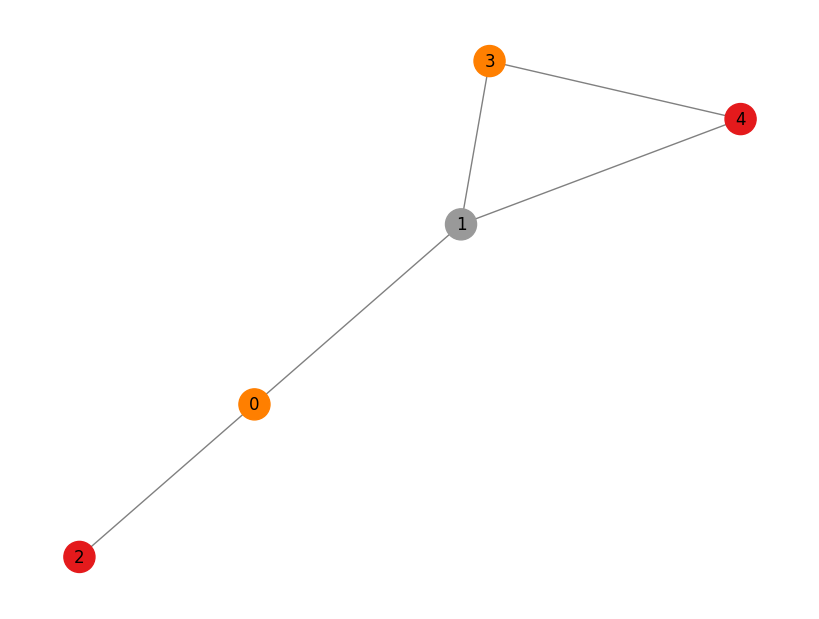

In [8]:
def plot_kingdoms():
    G = nx.Graph()
    for kingdom, neighbors_list in conflicts.items():
        for neighbor in neighbors_list:
            G.add_edge(kingdom, neighbor)

    pos = nx.spring_layout(G)
    factions_map = [solution[node] for node in G.nodes()]

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color=factions_map, cmap=plt.cm.Set1, edge_color='gray', node_size=500)
    plt.show()

plot_kingdoms()

39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
Kingdom Assignments: {0: 0, 1: 0, 2: 1, 3: 2, 4: 2, 5: 3, 6: 1, 7: 3, 8: 2, 9: 3, 10: 1, 11: 3, 12: 2, 13: 3, 14: 1, 15: 3, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0}


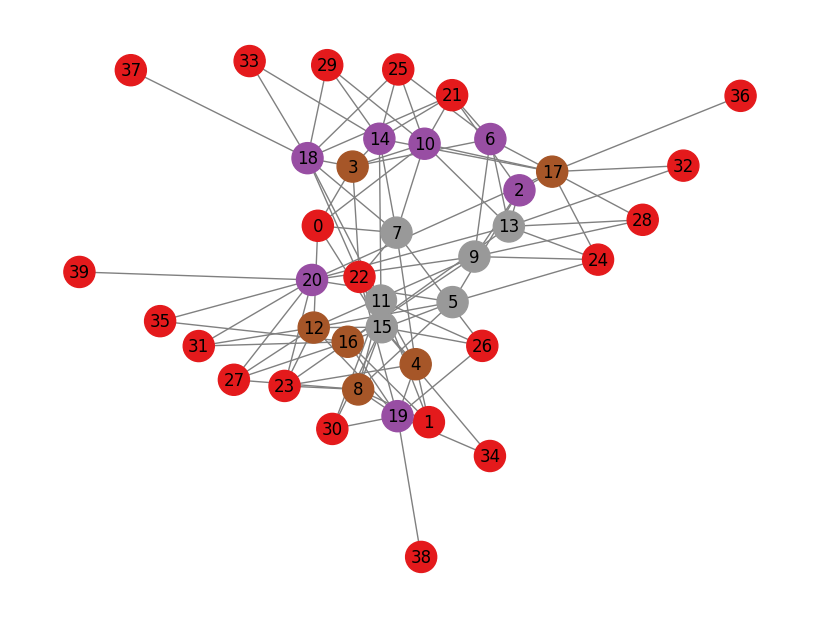

In [10]:
# uploaded = files.upload()
load_kingdom_data('map.txt')
solution = backtrack()
print("Kingdom Assignments:", solution)
plot_kingdoms()

## **Part 2: Unlocking the Treasure (Cryptarithmetic Puzzle CSP)**
### **Background:**
After successfully stabilizing the kingdom, the great vault of Eldoria's lost treasure has been discovered. However, it is **locked with an ancient code** that must be deciphered using a **cryptarithmetic puzzle**. Your task is to crack the code and unlock the treasure!

---

### **Problem Statement: Cryptarithmetic Puzzle**
The treasure chest is locked using a numerical puzzle where **letters represent unique digits (0-9)**. You must assign each letter a unique digit such that the given arithmetic equation holds.

#### **Example Puzzle:**
```
  GOLD
+ COIN
------
  CHEST
```
Each letter corresponds to a distinct digit, and the equation must be mathematically valid.

### **Constraints:**
- Each **letter represents a unique digit** (0-9).
- No two letters can have the **same digit**.
- The sum must be mathematically correct.
- No leading zeros.

---

### **Your Task:**
- Implement **Backtracking Search** to assign digits to letters.
- Use **Minimum Remaining Values (MRV)** and **Least Constraining Value (LCV)** heuristics to optimize the solution.
- Ensure the final assignment satisfies all constraints.

---

### **Implementation**

#### **Step 1: Define the Cryptarithmetic Puzzle**
We need a function to convert a word into a number based on a given letter-digit mapping.

📝 TODO: Implement word_to_number()
Convert a word into a number using the given mapping.
Example: If mapping = {'S': 9, 'E': 5, 'N': 6, 'D': 7},
then "SEND" should convert to 9567.

In [11]:
import itertools

def word_to_number(word, mapping):
    k = 1
    result = 0
    reverse = word[::-1]
    for char in reverse:
      result += mapping[char] * k
      k *= 10
    return result

def is_valid_solution(mapping, words, result):
    num1 = word_to_number(words[0], mapping)
    num2 = word_to_number(words[1], mapping)
    num3 = word_to_number(result, mapping)
    return num1 + num2 == num3


#### **Step 2: Solve Using Backtracking**
Identify all unique letters.
Generate all possible digit permutations for these letters.
Check each assignment to find a valid solution.

In [13]:
def solve_cryptarithmetic(words, result):
    letters = set("".join(words) + result)
    assert len(letters) <= 10

    for perm in itertools.permutations(range(10), len(letters)):
        mapping = dict(zip(letters, perm))

        if mapping[words[0][0]] == 0 or mapping[words[1][0]] == 0:
          continue

        if is_valid_solution(mapping, words, result):
            return mapping

    return None


#### **Step 3: Run and Display the Solution**

In [14]:
words = ["SEND", "MORE"]
result = "MONEY"
solution = solve_cryptarithmetic(words, result)
print("Solution:", solution if solution else "No solution found")

Solution: {'R': 8, 'E': 5, 'S': 9, 'O': 0, 'N': 6, 'M': 1, 'Y': 2, 'D': 7}


The Final Lock – Unlocking the Treasure Chest
After solving the kingdom conflict puzzle, you finally reach the hidden treasure chest deep inside the ruins of Eldoria. The chest is ancient, covered in golden engravings, and protected by a mystical numerical lock.

As you examine the lock, you notice an inscription:

"Only the sacred word shall reveal the wealth within. Transform the letters into digits, and the treasure shall be yours!"

You recall the ancient texts that spoke of "SERMON", a word of wisdom and power. But the lock requires a six-digit code that matches the letters in the word SERMON.

The final numeric code is:
958106

# 📌 **Adversarial Search - Othello AI**
### **Background**
After unlocking the treasure, you find an **ancient AI-driven board game** known as **Othello**!  
The grandmasters of Eldoria challenge you to **build an AI agent** that can **compete against them**.  

Your mission:  
✔ Implement **Minimax**, **Alpha-Beta Pruning**, and **Expectimax** to make your AI **unbeatable**.  
✔ Ensure **the AI follows the rules of Othello** and plays optimally.  

---

## **🛠️ Game Rules**
1. Players take turns placing pieces on an **8x8 board**.
2. A move is valid if it **captures at least one opponent piece**.
3. Captured pieces are **flipped** to the current player’s color.
4. The game **ends when both players have no valid moves**.
5. The player with the **most pieces on the board wins**.

---

## **🎯 Your Task**
- Implement a **valid move function**.
- Implement **Minimax, Alpha-Beta Pruning, and Expectimax** agents.
- Make the AI play **against itself**.

---

## **Step 1: Load Required Libraries**
Below is the game logic there is no need to change anything.

In [15]:
import pygame

WIDTH, HEIGHT = 600, 600
GRID_SIZE = 8
CELL_SIZE = WIDTH // GRID_SIZE
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (34, 139, 34)
GRAY = (200, 200, 200)

class Othello:
    def __init__(self):
        self.board = [[' ' for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]
        self.board[3][3] = self.board[4][4] = 'W'
        self.board[3][4] = self.board[4][3] = 'B'
        self.current_player = 'B'
        self.turn_count = 1

    def is_valid_move(self, row, col):
        if self.board[row][col] != ' ':
            return False
        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        opponent = 'B' if self.current_player == 'W' else 'W'

        for dr, dc in directions:
            r, c = row + dr, col + dc
            found_opponent = False
            while 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == opponent:
                r += dr
                c += dc
                found_opponent = True
            if found_opponent and 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == self.current_player:
                return True
        return False

    def get_valid_moves(self):
        return [(r, c) for r in range(GRID_SIZE) for c in range(GRID_SIZE) if self.is_valid_move(r, c)]

    def make_move(self, row, col):
        if not self.is_valid_move(row, col):
            return False

        self.board[row][col] = self.current_player
        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        opponent = 'B' if self.current_player == 'W' else 'W'

        for dr, dc in directions:
            r, c = row + dr, col + dc
            captured = []
            while 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == opponent:
                captured.append((r, c))
                r += dr
                c += dc
            if captured and 0 <= r < GRID_SIZE and 0 <= c < GRID_SIZE and self.board[r][c] == self.current_player:
                for cr, cc in captured:
                    self.board[cr][cc] = self.current_player

        self.current_player = 'B' if self.current_player == 'W' else 'W'
        self.turn_count += 1
        return True

    def game_over(self):
        current_moves = self.get_valid_moves()

        self.current_player = 'B' if self.current_player == 'W' else 'W'
        opponent_moves = self.get_valid_moves()

        self.current_player = 'B' if self.current_player == 'W' else 'W'

        return len(current_moves) == 0 and len(opponent_moves) == 0


    def get_winner(self):
        black_count = sum(row.count('B') for row in self.board)
        white_count = sum(row.count('W') for row in self.board)
        if black_count > white_count:
            return "Black Wins!"
        elif white_count > black_count:
            return "White Wins!"
        else:
            return "It's a Draw!"


pygame 2.6.1 (SDL 2.28.4, Python 3.11.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


## **Step 2: Implement AI Agents**
TODO: Implement Minimax Agent
Minimax recursively chooses the best move by:

Maximizing its own advantage.
Minimizing the opponent's advantage.
Exploring a tree of possible game states.

In [16]:
class MinimaxAgent:
    def __init__(self, depth):
        self.depth = depth

    def get_move(self, game):
        best_move = None
        best_value = -math.inf
        valid_moves = game.get_valid_moves()

        for move in valid_moves:
            game_copy = copy.deepcopy(game)
            game_copy.make_move(move[0], move[1])
            value = self.minimax(game_copy, self.depth - 1, False)

            if value > best_value:
                best_value = value
                best_move = move

        return best_move

    def minimax(self, game, depth, maximizing_player):
        if depth == 0 or game.game_over():
            return self.evaluate_board(game)

        valid_moves = game.get_valid_moves()

        if maximizing_player:
            max_value = -math.inf
            for move in valid_moves:
                game_copy = copy.deepcopy(game)
                game_copy.make_move(move[0], move[1])
                value = self.minimax(game_copy, depth - 1, False)
                max_value = max(max_value, value)
            return max_value
        else:
            min_value = math.inf
            for move in valid_moves:
                game_copy = copy.deepcopy(game)
                game_copy.make_move(move[0], move[1])
                value = self.minimax(game_copy, depth - 1, True)
                min_value = min(min_value, value)
            return min_value

    def evaluate_board(self, game):
        ai_piece = 'B'
        opponent_piece = 'W'
        score = 0
        score += sum(row.count(ai_piece) for row in game.board) * 1
        score -= sum(row.count(opponent_piece) for row in game.board) * 1
        corners = [(0, 0), (0, 7), (7, 0), (7, 7)]
        for r, c in corners:
            if game.board[r][c] == ai_piece:
                score += 15
            elif game.board[r][c] == opponent_piece:
                score -= 15

        return score

📝 TODO: Implement Alpha-Beta Pruning
Alpha-Beta Pruning optimizes Minimax by eliminating unnecessary branches.

In [17]:
class AlphaBetaAgent:
    def __init__(self, depth):
        self.depth = depth

    def get_move(self, game):
        best_move = None
        best_value = -math.inf
        alpha = -math.inf
        beta = math.inf
        valid_moves = game.get_valid_moves()

        for move in valid_moves:
            game_copy = copy.deepcopy(game)
            game_copy.make_move(move[0], move[1])
            value = self.alpha_beta(game_copy, self.depth - 1, alpha, beta, False)

            if value > best_value:
                best_value = value
                best_move = move

            alpha = max(alpha, best_value)
            if beta <= alpha:
                break

        return best_move

    def alpha_beta(self, game, depth, alpha, beta, maximizing_player):
        if depth == 0 or game.game_over():
            return self.evaluate_board(game)

        valid_moves = game.get_valid_moves()

        if maximizing_player:
            value = -math.inf
            for move in valid_moves:
                game_copy = copy.deepcopy(game)
                game_copy.make_move(move[0], move[1])
                value = max(value, self.alpha_beta(game_copy, depth - 1, alpha, beta, False))
                alpha = max(alpha, value)
                if beta <= alpha:
                    break
            return value
        else:
            value = math.inf
            for move in valid_moves:
                game_copy = copy.deepcopy(game)
                game_copy.make_move(move[0], move[1])
                value = min(value, self.alpha_beta(game_copy, depth - 1, alpha, beta, True))
                beta = min(beta, value)
                if beta <= alpha:
                    break
            return value

    def evaluate_board(self, game):
        ai_piece = 'B'
        opponent_piece = 'W'
        score = 0

        score += sum(row.count(ai_piece) for row in game.board)
        score -= sum(row.count(opponent_piece) for row in game.board)

        corners = [(0, 0), (0, 7), (7, 0), (7, 7)]
        for r, c in corners:
            if game.board[r][c] == ai_piece:
                score += 20
            elif game.board[r][c] == opponent_piece:
                score -= 20

        edges = [(0, i) for i in range(8)] + [(7, i) for i in range(8)] + \
                [(i, 0) for i in range(8)] + [(i, 7) for i in range(8)]
        for r, c in edges:
            if game.board[r][c] == ai_piece:
                score += 5
            elif game.board[r][c] == opponent_piece:
                score -= 5

        return score

📝 TODO: Implement Expectimax Agent
Expectimax is used when the opponent’s move is not optimal and follows a probabilistic strategy.

In [18]:
import copy
import math
import random

class ExpectimaxAgent:
    def __init__(self, depth):
        self.depth = depth

    def get_move(self, game):
        best_move = None
        best_value = -math.inf
        valid_moves = game.get_valid_moves()

        for move in valid_moves:
            game_copy = copy.deepcopy(game)
            game_copy.make_move(move[0], move[1])
            value = self.expectimax(game_copy, self.depth - 1, False)

            if value > best_value or (value == best_value and random.random() < 0.3):
                best_value = value
                best_move = move

        return best_move

    def expectimax(self, game, depth, maximizing_player):
        if depth == 0 or game.game_over():
            return self.evaluate_board(game)

        valid_moves = game.get_valid_moves()

        if maximizing_player:
            value = -math.inf
            for move in valid_moves:
                game_copy = copy.deepcopy(game)
                game_copy.make_move(move[0], move[1])
                value = max(value, self.expectimax(game_copy, depth - 1, False))
            return value
        else:
            total_value = 0
            for move in valid_moves:
                game_copy = copy.deepcopy(game)
                game_copy.make_move(move[0], move[1])
                probability = 1.0 / len(valid_moves)
                total_value += probability * self.expectimax(game_copy, depth - 1, True)
            return total_value

    def evaluate_board(self, game):
        ai_piece = 'B'
        opponent_piece = 'W'
        score = 0
        score += sum(row.count(ai_piece) for row in game.board) * 1
        score -= sum(row.count(opponent_piece) for row in game.board) * 1

        corners = [(0, 0), (0, 7), (7, 0), (7, 7)]
        for r, c in corners:
            if game.board[r][c] == ai_piece:
                score += 25
            elif game.board[r][c] == opponent_piece:
                score -= 25
        edges = []
        for i in range(8):
            edges.extend([(0, i), (7, i), (i, 0), (i, 7)])
        edges = list(set(edges))
        for r, c in edges:
            if game.board[r][c] == ai_piece:
                score += 5
            elif game.board[r][c] == opponent_piece:
                score -= 5
        current_player_moves = len(game.get_valid_moves())
        game.current_player = 'W' if game.current_player == 'B' else 'B'
        opponent_moves = len(game.get_valid_moves())
        game.current_player = 'W' if game.current_player == 'B' else 'B'
        score += (current_player_moves - opponent_moves) * 2

        return score

You can use the code below to initiate an agent and play with yourself

In [ ]:
import pygame

pygame.init()
screen = pygame.display.set_mode((600, 600))
pygame.display.set_caption("Othello Game")
game = Othello()

# agent = MinimaxAgent(depth=4)
agent = AlphaBetaAgent(depth=6)  # Using Alpha-Beta Pruning
# agent = ExpectimaxAgent(depth=4)

def draw_board(screen, game):
    screen.fill((34, 139, 34))
    for i in range(9):
        pygame.draw.line(screen, (0, 0, 0), (i * 75, 0), (i * 75, 600))
        pygame.draw.line(screen, (0, 0, 0), (0, i * 75), (600, i * 75))
    for r in range(8):
        for c in range(8):
            if game.board[r][c] == 'B':
                pygame.draw.circle(screen, (0, 0, 0), (c * 75 + 37, r * 75 + 37), 30)
            elif game.board[r][c] == 'W':
                pygame.draw.circle(screen, (255, 255, 255), (c * 75 + 37, r * 75 + 37), 30)
    font = pygame.font.Font(None, 36)
    turn_text = font.render(f"Turn: {game.turn_count}", True, (255, 255, 255))
    screen.blit(turn_text, (10, 10))

    pygame.display.flip()
running = True
while running:
    draw_board(screen, game)

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN and game.current_player == 'B':
            x, y = pygame.mouse.get_pos()
            row, col = y // 75, x // 75
            if (row, col) in game.get_valid_moves():
                game.make_move(row, col)
        elif game.current_player == 'W':
            ai_move = agent.get_move(game)
            if ai_move:
                game.make_move(*ai_move)

    if game.game_over():
        print("Game Over! Winner:", game.get_winner())
        pygame.time.delay(3000)
        running = False

pygame.quit()

you can use this code to make two agents play each other

In [19]:
import pygame

pygame.init()
screen = pygame.display.set_mode((600, 600))
pygame.display.set_caption("Othello AI vs AI")
game = Othello()
ai_player_B = AlphaBetaAgent(depth=6)
ai_player_W = ExpectimaxAgent(depth=4)

def draw_board(screen, game):
    """ Draws the Othello board and pieces """
    screen.fill((34, 139, 34))
    for i in range(9):
        pygame.draw.line(screen, (0, 0, 0), (i * 75, 0), (i * 75, 600))
        pygame.draw.line(screen, (0, 0, 0), (0, i * 75), (600, i * 75))

    for r in range(8):
        for c in range(8):
            if game.board[r][c] == 'B':
                pygame.draw.circle(screen, (0, 0, 0), (c * 75 + 37, r * 75 + 37), 30)
            elif game.board[r][c] == 'W':
                pygame.draw.circle(screen, (255, 255, 255), (c * 75 + 37, r * 75 + 37), 30)

    font = pygame.font.Font(None, 36)
    turn_text = font.render(f"Turn: {game.turn_count}", True, (255, 255, 255))
    screen.blit(turn_text, (10, 10))

    pygame.display.flip()
running = True
while running:
    pygame.event.pump()
    draw_board(screen, game)

    if game.game_over():
        print("Game Over! Winner:", game.get_winner())
        pygame.time.delay(3000)
        break
    valid_moves = game.get_valid_moves()

    if not valid_moves:
        print(f"No valid moves for {game.current_player}. Skipping turn.")
        game.current_player = 'B' if game.current_player == 'W' else 'W'
        continue
    pygame.time.delay(500)
    if game.current_player == 'B':
        ai_move = ai_player_B.get_move(game)
    else:
        ai_move = ai_player_W.get_move(game)

    if ai_move:
        game.make_move(*ai_move)

pygame.quit()


Game Over! Winner: Black Wins!
